# Task 1 + Task 2
# Problem Description
The problem that I will use Logistic Regression to solve is the classification of potential breast cancer patients. The data contains features 0-29, and they will be used to predict whether a given set of attributes is a patient with breast cancer. This is an ideal problem for the Logistic Regression model because it is a binary classification task, something that is commonly solved with Logistic Regression.

The dataset is imported using sklearn, and the source is the following link:

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

### Dependancies

In [68]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import copy
warnings.filterwarnings("ignore")

### Importing the Dataset

In [11]:
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
# add target label
df['target'] = data.target
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

### EDA

In [12]:
# data shape
df.shape

(569, 31)

In [13]:
# data nulls
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

There are no null values in the dataset

In [20]:
# basic statistics of the dataset
df.describe().transpose()

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   
target                   569.0    0.627417    0.483918    0.000000   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.40000

<AxesSubplot:>

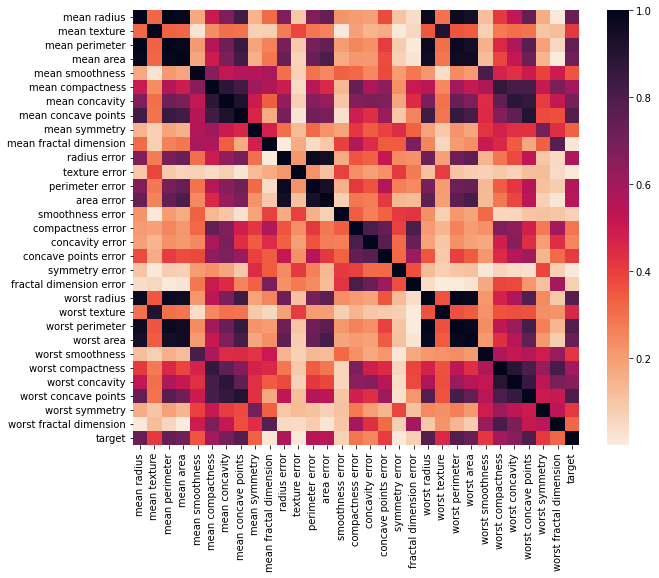

In [19]:
# heatmap to describe how features correlate with each other
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr().abs(),annot=False, ax=ax, cmap='rocket_r')

In [23]:
# get the counts of the target labels
# 0 - benign
# 1 - malignant
benign, malignant = df['target'].value_counts()
print('Number of Malignant:', malignant)
print('Number of Benign:', benign)

Number of Malignant: 212
Number of Benign: 357


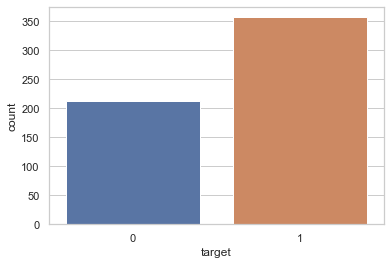

In [27]:
# target labels as a count plot
sns.set(style="whitegrid")
ax = sns.countplot(df.target , label="Count")

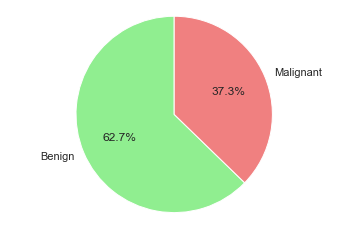

In [45]:
# target labels as a pie chart

# params
labels = 'Benign', 'Malignant'
sizes = df['target'].value_counts()
colors = ['lightgreen', 'lightcoral']
explode= [0.4,0]

# plotting
plt.pie(sizes, explode=explode, labels=labels,radius= 1400 ,colors=colors,
autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.show()

# Task 3 - Building the Logistic Regression Model

In [69]:
class LogisticRegression():
    def __init__(self):
        self.losses = []
        self.train_accuracies = []

    def fit(self, x, y, epochs):
        x = self._transform_x(x)
        y = self._transform_y(y)

        self.weights = np.zeros(x.shape[1])
        self.bias = 0

        for i in range(epochs):
            x_dot_weights = np.matmul(self.weights, x.transpose()) + self.bias
            pred = self._sigmoid(x_dot_weights)
            loss = self.compute_loss(y, pred)
            error_w, error_b = self.compute_gradients(x, y, pred)
            self.update_model_parameters(error_w, error_b)

            pred_to_class = [1 if p > 0.5 else 0 for p in pred]
            self.train_accuracies.append(accuracy_score(y, pred_to_class))
            self.losses.append(loss)

    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        y_zero_loss = y_true * np.log(y_pred + 1e-9)
        y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
        return -np.mean(y_zero_loss + y_one_loss)

    def compute_gradients(self, x, y_true, y_pred):
        # derivative of binary cross entropy
        difference =  y_pred - y_true
        gradient_b = np.mean(difference)
        gradients_w = np.matmul(x.transpose(), difference)
        gradients_w = np.array([np.mean(grad) for grad in gradients_w])

        return gradients_w, gradient_b

    def update_model_parameters(self, error_w, error_b):
        self.weights = self.weights - 0.1 * error_w
        self.bias = self.bias - 0.1 * error_b

    def predict(self, x):
        x_dot_weights = np.matmul(x, self.weights.transpose()) + self.bias
        probabilities = self._sigmoid(x_dot_weights)
        return [1 if p > 0.5 else 0 for p in probabilities]

    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])

    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1 / (1 + z)
        else:
            z = np.exp(x)
            return z / (1 + z)

    def _transform_x(self, x):
        x = copy.deepcopy(x)
        return x.values

    def _transform_y(self, y):
        y = copy.deepcopy(y)
        return y.values.reshape(y.shape[0], 1)

In [72]:
# feature data 
X_data = data.data
X_columns = data.feature_names
x = pd.DataFrame(X_data, columns=X_columns)

# target data
y_data = data.target
y = pd.Series(y_data, name='target')

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#creating the class Object
regressor = LogisticRegression()

# fit model to data
regressor.fit(x_train , y_train, epochs=150)

# predict target labels
y_pred = regressor.predict(x_test)

# compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9298245614035088
